In [109]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [110]:
df = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/Car_price_prediction/main/dataset/1.04.%20Real-life%20example.csv")
df.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [111]:
print(df.isnull().sum())
print(df.duplicated().sum())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
73


In [112]:
df.dropna(inplace = True)
print(df.isnull().sum())
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64
0


In [113]:
df.corr(numeric_only = True)

Price   Mileage   EngineV      Year
Price    1.000000 -0.467020  0.056607  0.482254
Mileage -0.467020  1.000000  0.025992 -0.659998
EngineV  0.056607  0.025992  1.000000 -0.030882
Year     0.482254 -0.659998 -0.030882  1.000000

dealing with outliers

Price 4.573431787192262 Mileage 0.7040205553815342 EngineV 17.066126300156633 Year -0.9618801579156085


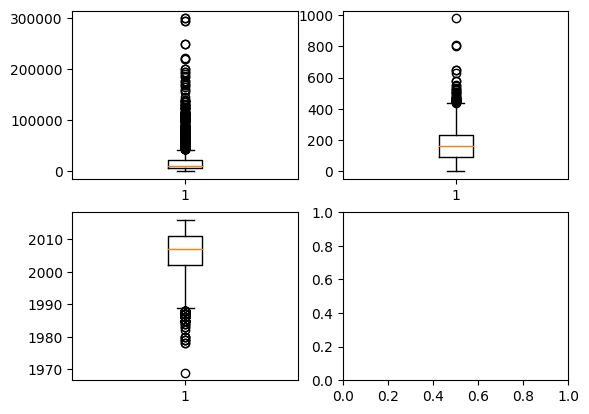

In [114]:

print("Price",df['Price'].skew(),"Mileage",df['Mileage'].skew(),"EngineV",df['EngineV'].skew(),"Year",df['Year'].skew())
def pltbox():
  fig, axes = plt.subplots(2,2)
  axes[0,0].boxplot(df['Price'])
  axes[0,1].boxplot(df['Mileage'])
  axes[1,0].boxplot(df['Year'])
pltbox()

Considering anything above 90th percentile to be an outlier

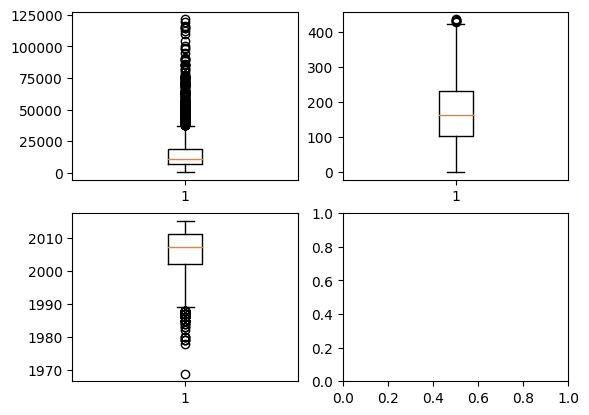

In [115]:
limitPrice = df['Price'].quantile(0.99)
limitYear = df['Year'].quantile(0.99)
limitMileage = df['Mileage'].quantile(0.99)
df = df[df['Price']<limitPrice]
df = df[df['Year']<limitYear]
df = df[df['Mileage']<limitMileage]
df.reset_index()
pltbox()


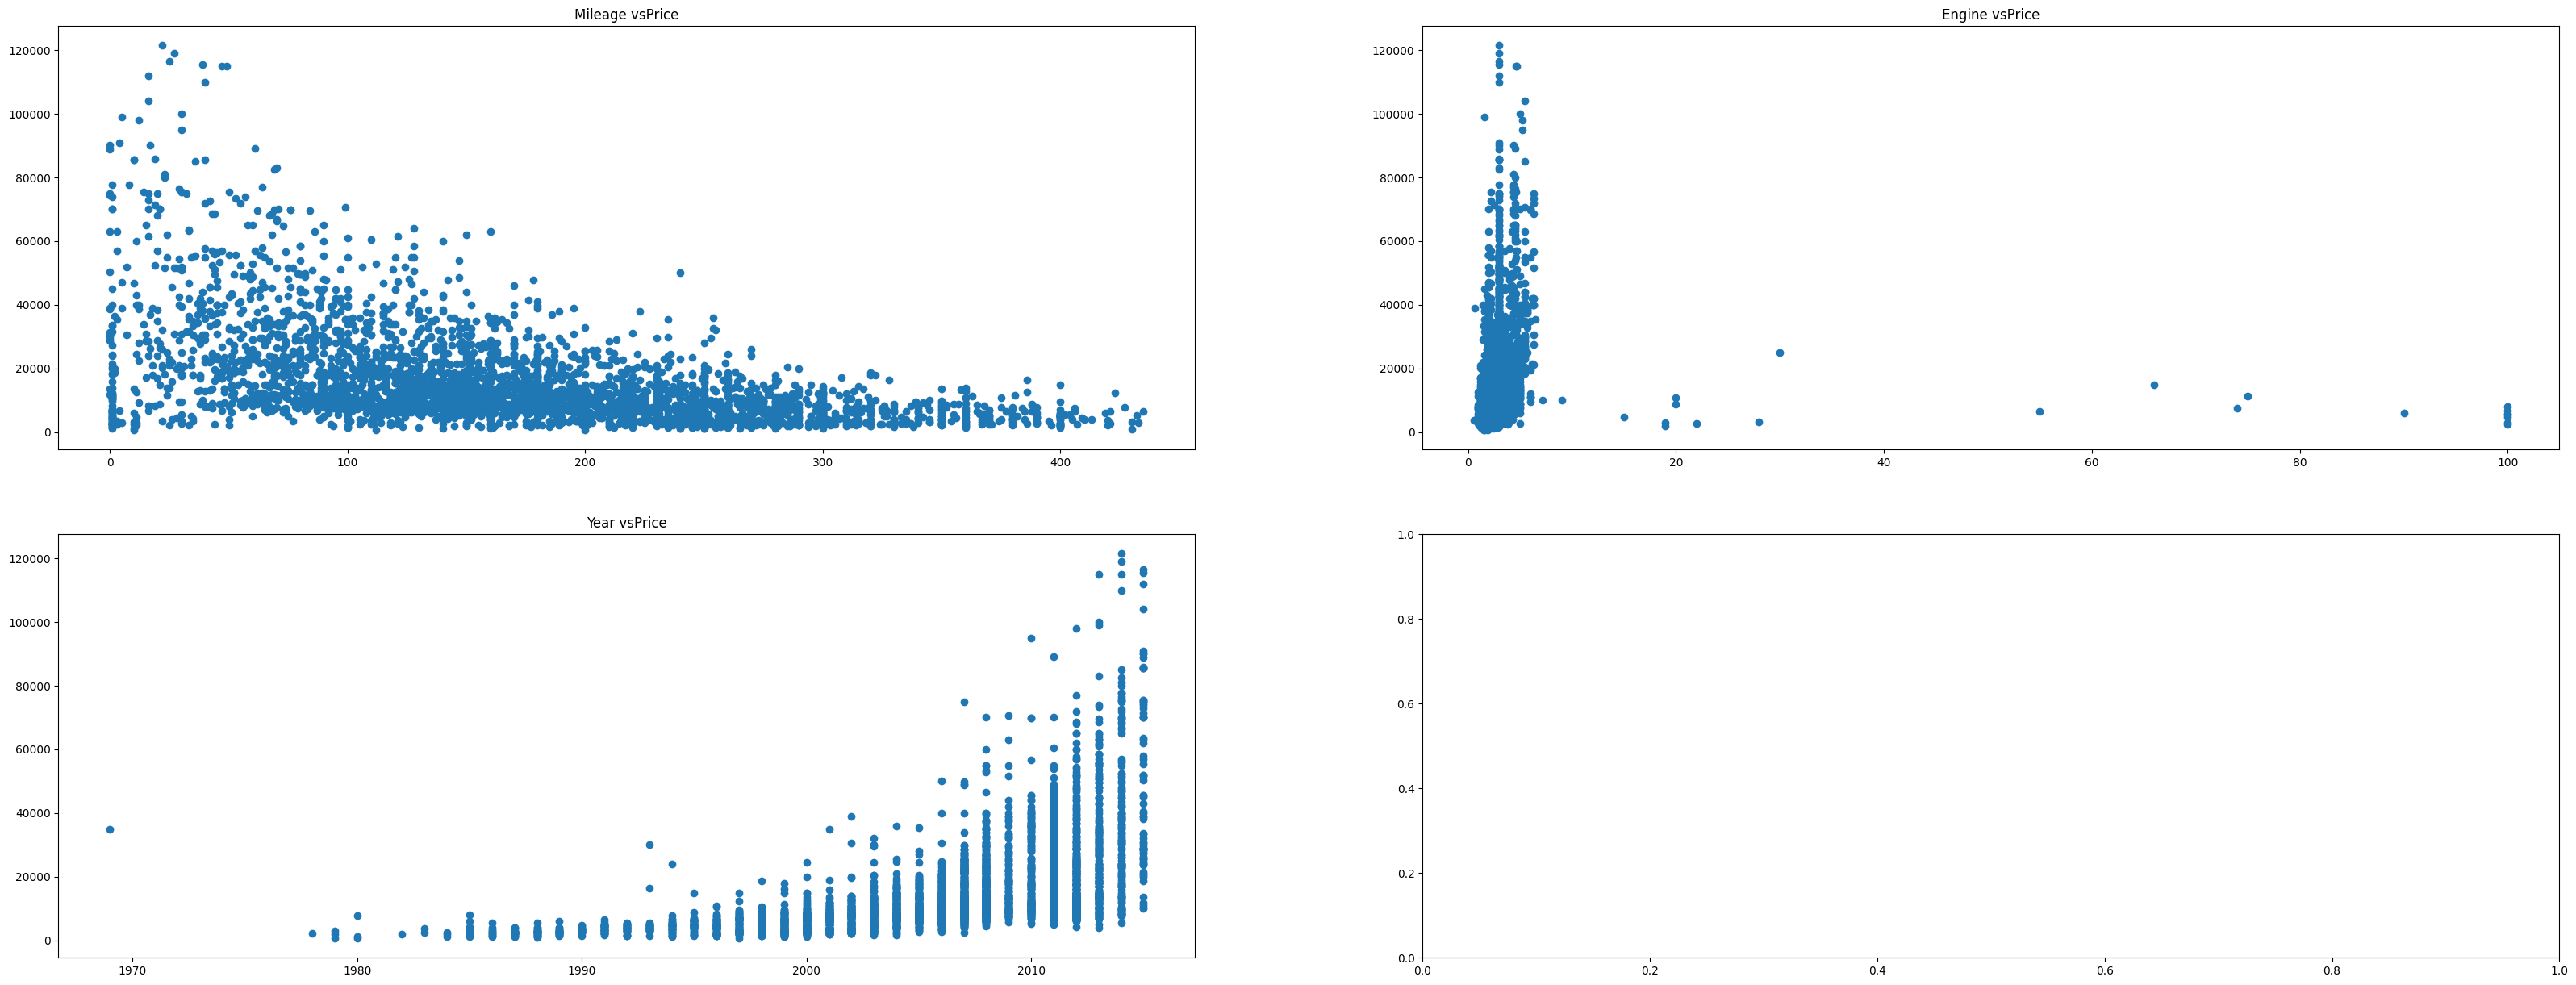

In [116]:
def pt(y):
  fig,axes = plt.subplots(2,2)
  fig.set_figheight(15)
  fig.set_figwidth(40)
  axes[0,0].scatter(df['Mileage'],df[y])
  axes[0,0].set_title("Mileage vs"+y)
  axes[0,1].scatter(df['EngineV'],df[y])
  axes[0,1].set_title("Engine vs"+y)
  axes[1,0].scatter(df['Year'],df[y])
  axes[1,0].set_title('Year vs'+y)
pt('Price')

No linear relationship so applying log transformation

Price   Mileage   EngineV      Year  log_Price
Price      1.000000 -0.503564  0.048196  0.537896   0.860293
Mileage   -0.503564  1.000000  0.032854 -0.626477  -0.546559
EngineV    0.048196  0.032854  1.000000 -0.034593   0.034309
Year       0.537896 -0.626477 -0.034593  1.000000   0.726761
log_Price  0.860293 -0.546559  0.034309  0.726761   1.000000

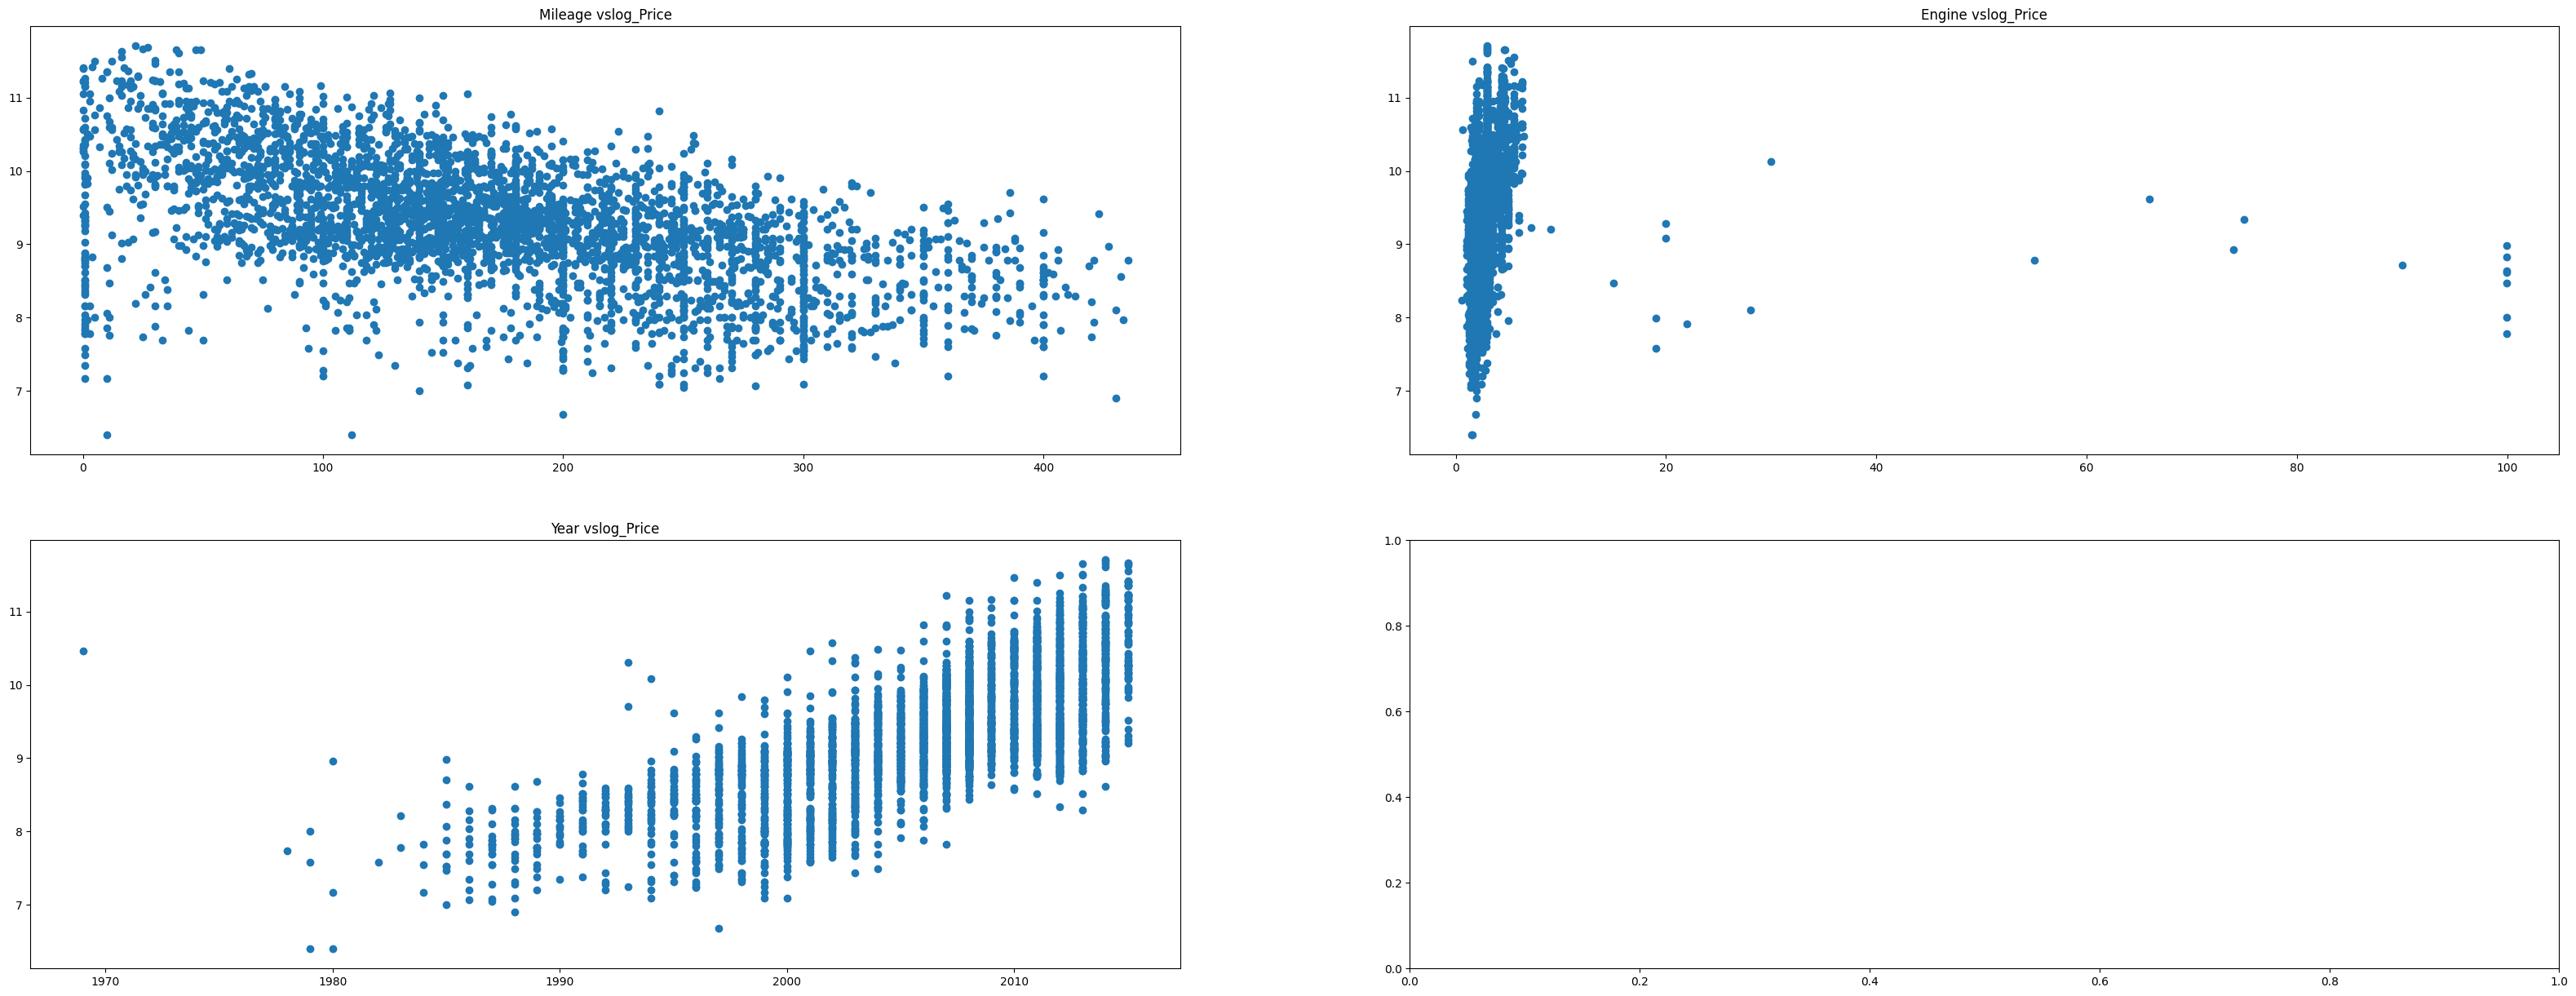

In [117]:
df['log_Price'] = np.log(df['Price'])
pt('log_Price')
df.corr(numeric_only = True)

dropping enginev as it has no linear pattern and is most skewed also has very less correlation with price

In [118]:
df.drop(['EngineV','Model'],axis = 1,inplace = True)


Applying one hot encoding for converting categorical columns

In [119]:
cat_columns = ['Brand','Body','Engine Type','Registration']
new_df = pd.get_dummies(df, columns = cat_columns)
new_df

Price  Mileage  Year  log_Price  Brand_Audi  Brand_BMW  \
0      4200.0      277  1991   8.342840           0          1   
1      7900.0      427  1999   8.974618           0          0   
2     13300.0      358  2003   9.495519           0          0   
3     23000.0      240  2007  10.043249           1          0   
4     18300.0      120  2011   9.814656           0          0   
...       ...      ...   ...        ...         ...        ...   
4338  11500.0      163  2008   9.350102           0          0   
4339  17900.0       35  2014   9.792556           0          0   
4341   6500.0        1  1999   8.779557           0          1   
4342   8000.0      194  1985   8.987197           0          1   
4344  13500.0      124  2013   9.510445           0          0   

      Brand_Mercedes-Benz  Brand_Mitsubishi  Brand_Renault  Brand_Toyota  ...  \
0                       0                 0              0             0  ...   
1                       1                 0              0             0  ...   
2                       1                 0              0             0  ...   
3                       0                 0              0             0  ...   
4                       0                 0              0             1  ...   
...                   ...               ...            ...           ...  ...   
4338                    0                 0              0             0  ...   
4339                    0                 0              0             1  ...   
4341                    0                 0              0             0  ...   
4342                    0                 0              0             0  ...   
4344                    0                 0              0             0  ...   

      Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Diesel  \
0              0           1           0         0                   0   
1              0           0           0         1                   1   
2              0           1           0         0                   0   
3              0           0           0         0                   0   
4              0           0           0         0                   0   
...          ...         ...         ...       ...                 ...   
4338           0           0           0         1                   1   
4339           0           1           0         0                   0   
4341           0           1           0         0                   0   
4342           0           1           0         0                   0   
4344           0           0           0         1                   1   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_no  \
0                   0                  0                   1                0   
1                   0                  0                   0                0   
2                   1                  0                   0                0   
3                   0                  0                   1                0   
4                   0                  0                   1                0   
...               ...                ...                 ...              ...   
4338                0                  0                   0                0   
4339                0                  0                   1                0   
4341                0                  0                   1                0   
4342                0                  0                   1                0   
4344                0                  0                   0                0   

      Registration_yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
4338                 1  
4339                 1  
4341                 1  
4342                 1  
4344                 1  

[3722 rows x 23 columns]

Splitting the data into train and test

In [120]:
X = new_df.drop(['Price','log_Price'],axis=1)
y = new_df['log_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


Checking train data one last time

In [121]:
X_train

Mileage  Year  Brand_Audi  Brand_BMW  Brand_Mercedes-Benz  \
625       206  2003           1          0                    0   
2994      121  2009           0          0                    0   
2796      290  1997           0          1                    0   
3660      179  2007           0          0                    0   
538       320  1996           1          0                    0   
...       ...   ...         ...        ...                  ...   
3542      251  2002           0          0                    1   
2407      269  2002           0          0                    0   
3128      145  2000           0          0                    0   
36        300  1996           0          1                    0   
397       300  1997           0          1                    0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
625                  0              0             0                 0   
2994                 1              0             0                 0   
2796                 0              0             0                 0   
3660                 0              0             0                 1   
538                  0              0             0                 0   
...                ...            ...           ...               ...   
3542                 0              0             0                 0   
2407                 1              0             0                 0   
3128                 0              0             0                 1   
36                   0              0             0                 0   
397                  0              0             0                 0   

      Body_crossover  ...  Body_other  Body_sedan  Body_vagon  Body_van  \
625                0  ...           0           1           0         0   
2994               0  ...           0           1           0         0   
2796               0  ...           0           1           0         0   
3660               1  ...           0           0           0         0   
538                0  ...           0           1           0         0   
...              ...  ...         ...         ...         ...       ...   
3542               1  ...           0           0           0         0   
2407               1  ...           0           0           0         0   
3128               0  ...           0           1           0         0   
36                 0  ...           0           1           0         0   
397                0  ...           0           1           0         0   

      Engine Type_Diesel  Engine Type_Gas  Engine Type_Other  \
625                    1                0                  0   
2994                   0                1                  0   
2796                   0                1                  0   
3660                   1                0                  0   
538                    0                0                  1   
...                  ...              ...                ...   
3542                   0                1                  0   
2407                   1                0                  0   
3128                   0                0                  0   
36                     0                0                  0   
397                    0                0                  0   

      Engine Type_Petrol  Registration_no  Registration_yes  
625                    0                0                 1  
2994                   0                0                 1  
2796                   0                0                 1  
3660                   0                0                 1  
538                    0                1                 0  
...                  ...              ...               ...  
3542                   0                0                 1  
2407                   0                0                 1  
3128                   1                0                 1  
36                     1          

Training the Model

In [122]:
clf = LinearRegression()

clf.fit(X_train,y_train)

LinearRegression()

Checking the accuracy

In [123]:
clf.score(X_test,y_test)

0.8315131643173899

83% accuracy (R^2 value)